In [2]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import os
import pandas as pd

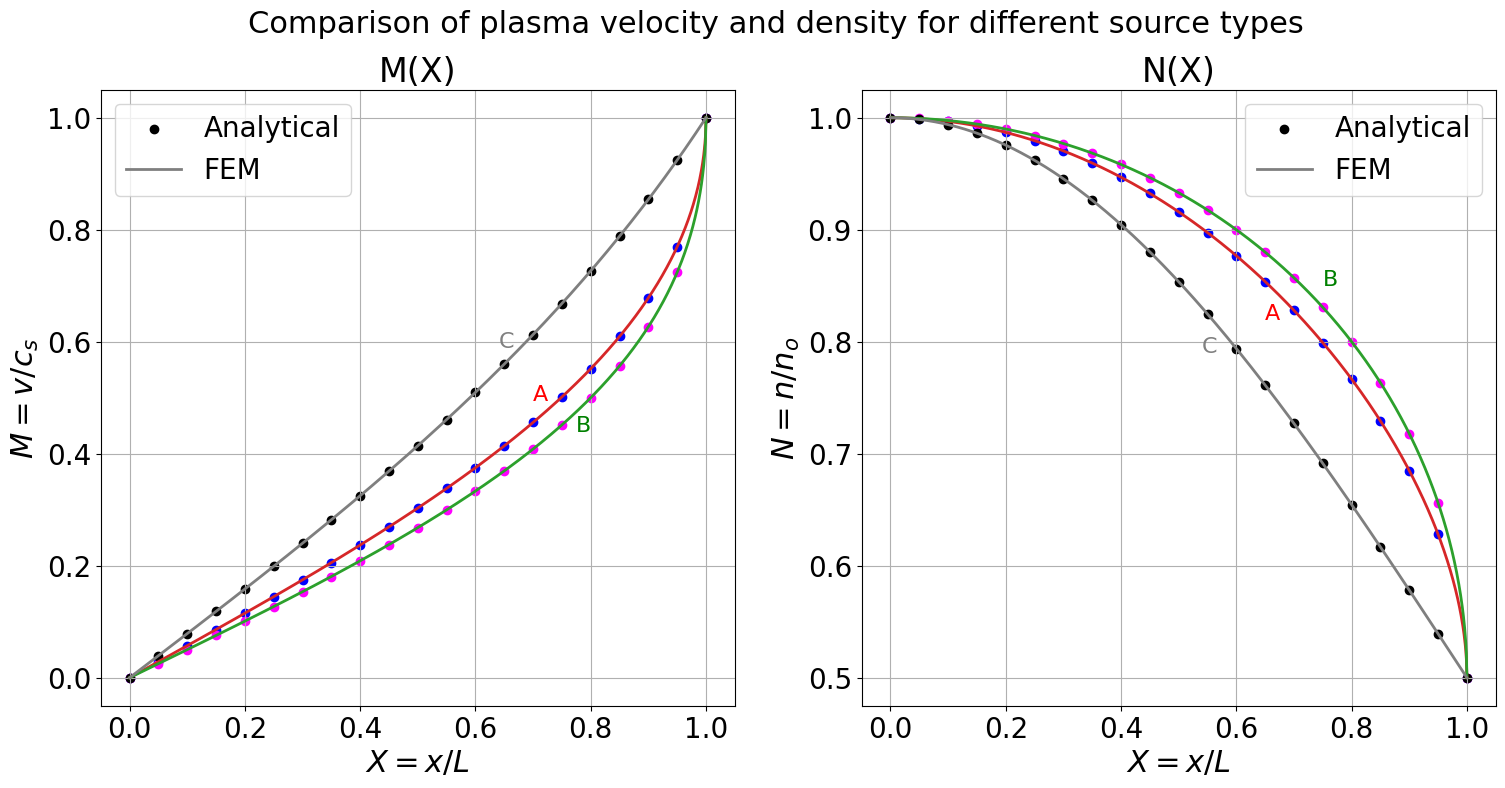

In [3]:
#%matplotlib widget
n_points = 1001
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(18,8))
dX = 50
X = np.linspace(0.0,1.0, n_points)

################################ SOURCE TYPE A
# analytical
def func(M, X):
    return 2*np.arctan(M) - M - (np.pi/2 - 1)*X
M = np.asarray([fsolve(func, X_, X_)[0] for X_ in X])
N = 1 / (1 + M**2)

# fem
file = "field_distribution_Sp_A_Linear.csv"
df = pd.read_csv(os.path.abspath(file))
X_sim = df.get("arc_length")
N_sim = df.get("N")
M_sim = df.get("M")

err_A_M    = abs(M - M_sim) * 100
relerr_A_M = err_A_M / abs(M)

err_A_N    = abs(N - N_sim) * 100
relerr_A_N = err_A_N / abs(N)

# plot
ax1.scatter(X[::dX], M[::dX], color="blue")
ax2.scatter(X[::dX], N[::dX], color="blue")
ax1.plot(X_sim, M_sim, color="tab:red", linestyle="solid", linewidth=2)
ax2.plot(X_sim, N_sim, color="tab:red", linestyle="solid", linewidth=2)

################################ SOURCE TYPE B
# analytical
def func(M, X):
    return (1+M**2)*X - 2*M
M = np.asarray([fsolve(func, X_, X_)[0] for X_ in X])
N = 1 / (1 + M*M)

# fem
file = "field_distribution_Sp_B_Constant.csv"
df = pd.read_csv(os.path.abspath(file))
X_sim = df.get("arc_length")
N_sim = df.get("N")
M_sim = df.get("M")

err_B_M    = abs(M - M_sim) * 100
relerr_B_M = err_B_M / abs(M)

err_B_N    = abs(N - N_sim) * 100
relerr_B_N = err_B_N / abs(N)

# plot
ax1.scatter(X[::dX], M[::dX], color="magenta")
ax2.scatter(X[::dX], N[::dX], color="magenta")
ax1.plot(X_sim, M_sim, color="tab:green", linestyle="solid", linewidth=2)
ax2.plot(X_sim, N_sim, color="tab:green", linestyle="solid", linewidth=2)

################################ SOURCE TYPE C
# analytical
M = np.tan(np.pi*X/4)
N = 1 / (1 + M*M)

# fem
file = "field_distribution_Sp_C_Nonlinear.csv"
df = pd.read_csv(os.path.abspath(file))
X_sim = df.get("arc_length")
N_sim = df.get("N")
M_sim = df.get("M")

err_C_M    = abs(M - M_sim) * 100
relerr_C_M = err_C_M / abs(M)

err_C_N    = abs(N - N_sim) * 100
relerr_C_N = err_C_N / abs(N)

# plot
ax1.scatter(X[::dX], M[::dX], label="Analytical", color="black")
ax2.scatter(X[::dX], N[::dX], label="Analytical", color="black")
ax1.plot(X_sim, M_sim, label="FEM", color="tab:grey", linestyle="solid", linewidth=2)
ax2.plot(X_sim, N_sim, label="FEM", color="tab:grey", linestyle="solid", linewidth=2)

################################ PLOT CONFIGURATION
ax1.set_title("M(X)", fontsize=24)
ax2.set_title("N(X)", fontsize=24)
ax1.set_ylabel("$M = v/c_s$",fontsize=22)
ax2.set_ylabel("$N = n/n_o$", fontsize=22)

ax1.annotate("A", xy=(0.7,0.495),  xytext=(0.7,0.495),  color="red",   size=16)
ax1.annotate("B", xy=(0.775,0.44), xytext=(0.775,0.44), color="green", size=16)
ax1.annotate("C", xy=(0.64,0.59),  xytext=(0.64,0.59),  color="grey",  size=16)

ax2.annotate("A", xy=(0.5,0.5), xytext=(0.65,0.82), color="red", size=16)
ax2.annotate("B", xy=(0.5,0.5), xytext=(0.75,0.85), color="green", size=16)
ax2.annotate("C", xy=(0.54,0.79), xytext=(0.54,0.79), color="grey", size=16)

for ax in [ax1, ax2]:
    ax.legend(fontsize=20)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    ax.set_xlabel("$X = x/L$", fontsize=22)
    ax.grid()
    
fig.suptitle("Comparison of plasma velocity and density for different source types", fontsize=22)
fig.savefig("1D_Plasma_All_3_sources.png", )
fig.savefig("1D_Plasma_All_3_sources.svg")
plt.show()

For Finnfusion seminar
---

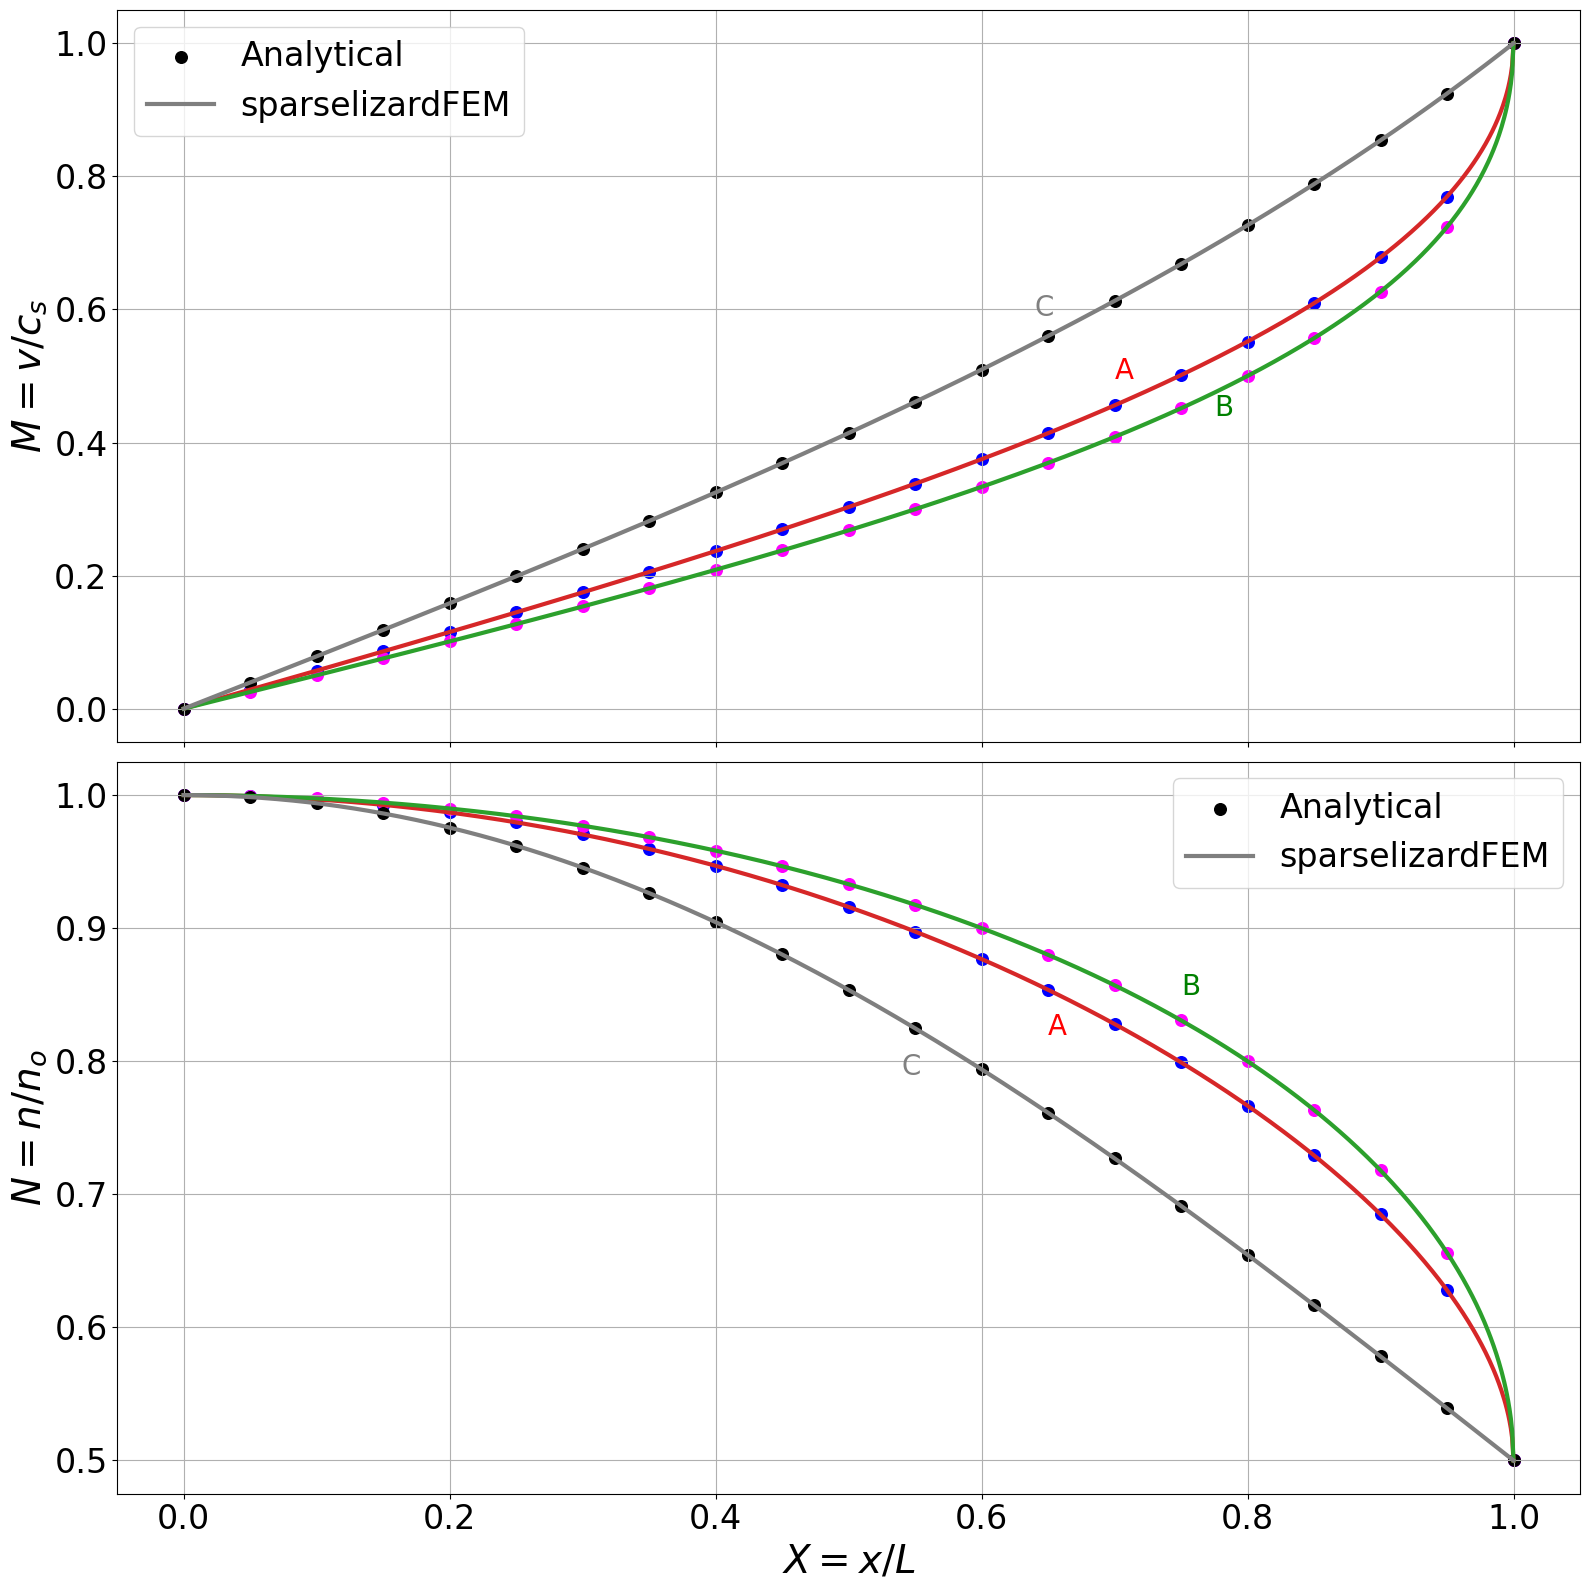

In [10]:
n_points = 1001
fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(16,16), sharex=True)
dX = 50
X = np.linspace(0.0,1.0, n_points)

markersize = 70

################################ SOURCE TYPE A
# analytical
def func(M, X):
    return 2*np.arctan(M) - M - (np.pi/2 - 1)*X
M = np.asarray([fsolve(func, X_, X_)[0] for X_ in X])
N = 1 / (1 + M**2)

# fem
file = "field_distribution_Sp_A_Linear.csv"
df = pd.read_csv(os.path.abspath(file))
X_sim = df.get("arc_length")
N_sim = df.get("N")
M_sim = df.get("M")

err_A_M    = abs(M - M_sim) * 100
relerr_A_M = err_A_M / abs(M)

err_A_N    = abs(N - N_sim) * 100
relerr_A_N = err_A_N / abs(N)

# plot
ax1.scatter(X[::dX], M[::dX], color="blue", s=markersize)
ax2.scatter(X[::dX], N[::dX], color="blue", s=markersize)
ax1.plot(X_sim, M_sim, color="tab:red", linestyle="solid", linewidth=3)
ax2.plot(X_sim, N_sim, color="tab:red", linestyle="solid", linewidth=3)

################################ SOURCE TYPE B
# analytical
def func(M, X):
    return (1+M**2)*X - 2*M
M = np.asarray([fsolve(func, X_, X_)[0] for X_ in X])
N = 1 / (1 + M*M)

# fem
file = "field_distribution_Sp_B_Constant.csv"
df = pd.read_csv(os.path.abspath(file))
X_sim = df.get("arc_length")
N_sim = df.get("N")
M_sim = df.get("M")

err_B_M    = abs(M - M_sim) * 100
relerr_B_M = err_B_M / abs(M)

err_B_N    = abs(N - N_sim) * 100
relerr_B_N = err_B_N / abs(N)

# plot
ax1.scatter(X[::dX], M[::dX], color="magenta", s=markersize)
ax2.scatter(X[::dX], N[::dX], color="magenta", s=markersize)
ax1.plot(X_sim, M_sim, color="tab:green", linestyle="solid", linewidth=3)
ax2.plot(X_sim, N_sim, color="tab:green", linestyle="solid", linewidth=3)

################################ SOURCE TYPE C
# analytical
M = np.tan(np.pi*X/4)
N = 1 / (1 + M*M)

# fem
file = "field_distribution_Sp_C_Nonlinear.csv"
df = pd.read_csv(os.path.abspath(file))
X_sim = df.get("arc_length")
N_sim = df.get("N")
M_sim = df.get("M")

err_C_M    = abs(M - M_sim) * 100
relerr_C_M = err_C_M / abs(M)

err_C_N    = abs(N - N_sim) * 100
relerr_C_N = err_C_N / abs(N)

# plot
ax1.scatter(X[::dX], M[::dX], label="Analytical", color="black", s=markersize)
ax2.scatter(X[::dX], N[::dX], label="Analytical", color="black", s=markersize)
ax1.plot(X_sim, M_sim, label="sparselizardFEM", color="tab:grey", linestyle="solid", linewidth=3)
ax2.plot(X_sim, N_sim, label="sparselizardFEM", color="tab:grey", linestyle="solid", linewidth=3)

################################ PLOT CONFIGURATION
ax1.set_ylabel("$M = v/c_s$",fontsize=28)
ax2.set_ylabel("$N = n/n_o$", fontsize=28)

ax1.annotate("A", xy=(0.7,0.495),  xytext=(0.7,0.495),  color="red",   size=20)
ax1.annotate("B", xy=(0.775,0.44), xytext=(0.775,0.44), color="green", size=20)
ax1.annotate("C", xy=(0.64,0.59),  xytext=(0.64,0.59),  color="grey",  size=20)

ax2.annotate("A", xy=(0.5,0.5), xytext=(0.65,0.82), color="red", size=20)
ax2.annotate("B", xy=(0.5,0.5), xytext=(0.75,0.85), color="green", size=20)
ax2.annotate("C", xy=(0.54,0.79), xytext=(0.54,0.79), color="grey", size=20)

for ax in [ax1, ax2]:
    ax.legend(fontsize=24)
    ax.tick_params(axis='x', labelsize=24)
    ax.tick_params(axis='y', labelsize=24)
    ax.grid()
ax2.set_xlabel("$X = x/L$", fontsize=28)

fig.tight_layout()
    
fig.savefig("1D_Plasma_All_3_sources_finnfusion.png")
plt.show()

#### ERROR PLOT

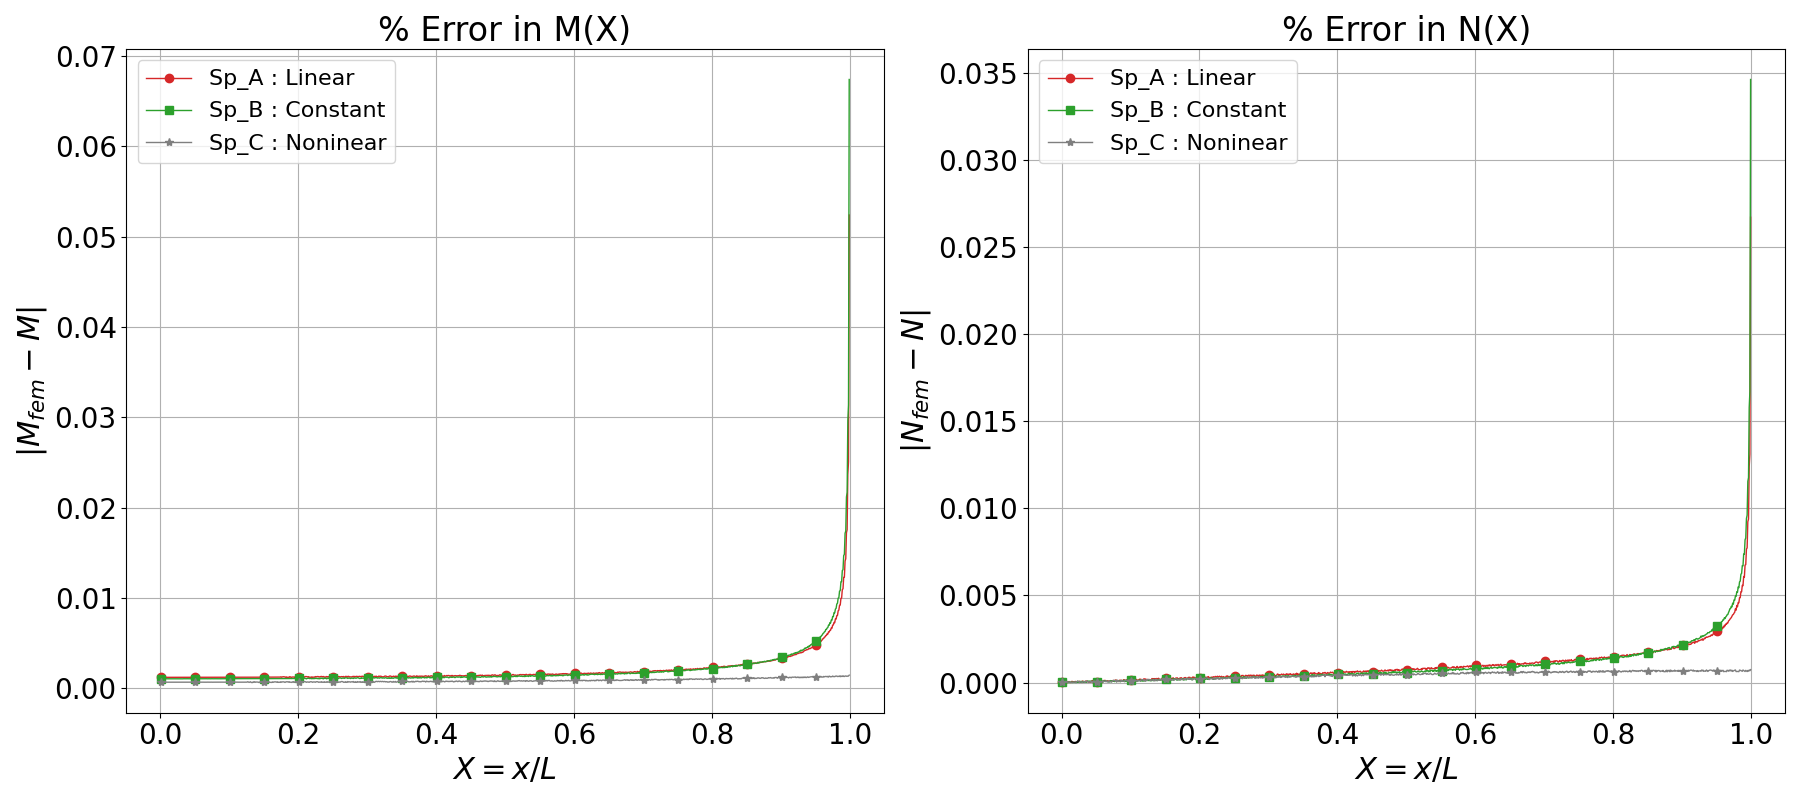

In [4]:
#%matplotlib widget

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(18,8))

plot_dict_kwargs = {"linestyle":"solid", "linewidth":1, "markevery":50}

ax1.plot(X[1:-1], err_A_M[1:-1], marker='o', label="Sp_A : Linear",   color="tab:red",   **plot_dict_kwargs)
ax1.plot(X[1:-1], err_B_M[1:-1], marker='s', label="Sp_B : Constant", color="tab:green", **plot_dict_kwargs)
ax1.plot(X[1:-1], err_C_M[1:-1], marker='*', label="Sp_C : Noninear", color="tab:grey",  **plot_dict_kwargs)

ax2.plot(X[1:-1], err_A_N[1:-1], marker='o', label="Sp_A : Linear",   color="tab:red",   **plot_dict_kwargs)
ax2.plot(X[1:-1], err_B_N[1:-1], marker='s', label="Sp_B : Constant", color="tab:green", **plot_dict_kwargs)
ax2.plot(X[1:-1], err_C_N[1:-1], marker='*', label="Sp_C : Noninear", color="tab:grey",  **plot_dict_kwargs)

################################ PLOT CONFIGURATION
ax1.set_title("% Error in M(X)", fontsize=24)
ax2.set_title("% Error in N(X)", fontsize=24)
ax1.set_ylabel("$|M_{fem} - M|$", fontsize=22)
ax2.set_ylabel("$|N_{fem} - N|$", fontsize=22)

#ax1.annotate("A", xy=(0.7,0.495),  xytext=(0.7,0.495),  color="red",   size=16)
#ax1.annotate("B", xy=(0.775,0.44), xytext=(0.775,0.44), color="green", size=16)
#ax1.annotate("C", xy=(0.64,0.59),  xytext=(0.64,0.59),  color="grey",  size=16)

#ax2.annotate("A", xy=(0.5,0.5), xytext=(0.65,0.82), color="red", size=16)
#ax2.annotate("B", xy=(0.5,0.5), xytext=(0.75,0.85), color="green", size=16)
#ax2.annotate("C", xy=(0.54,0.79), xytext=(0.54,0.79), color="grey", size=16)

for ax in [ax1, ax2]:
    ax.legend(fontsize=16)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    ax.set_xlabel("$X = x/L$", fontsize=22)
    ax.grid()

plt.tight_layout()
fig.savefig("Error_plots.svg")
fig.savefig("Error_plots.png")
plt.show()

#### RELATIVE ERROR PLOT

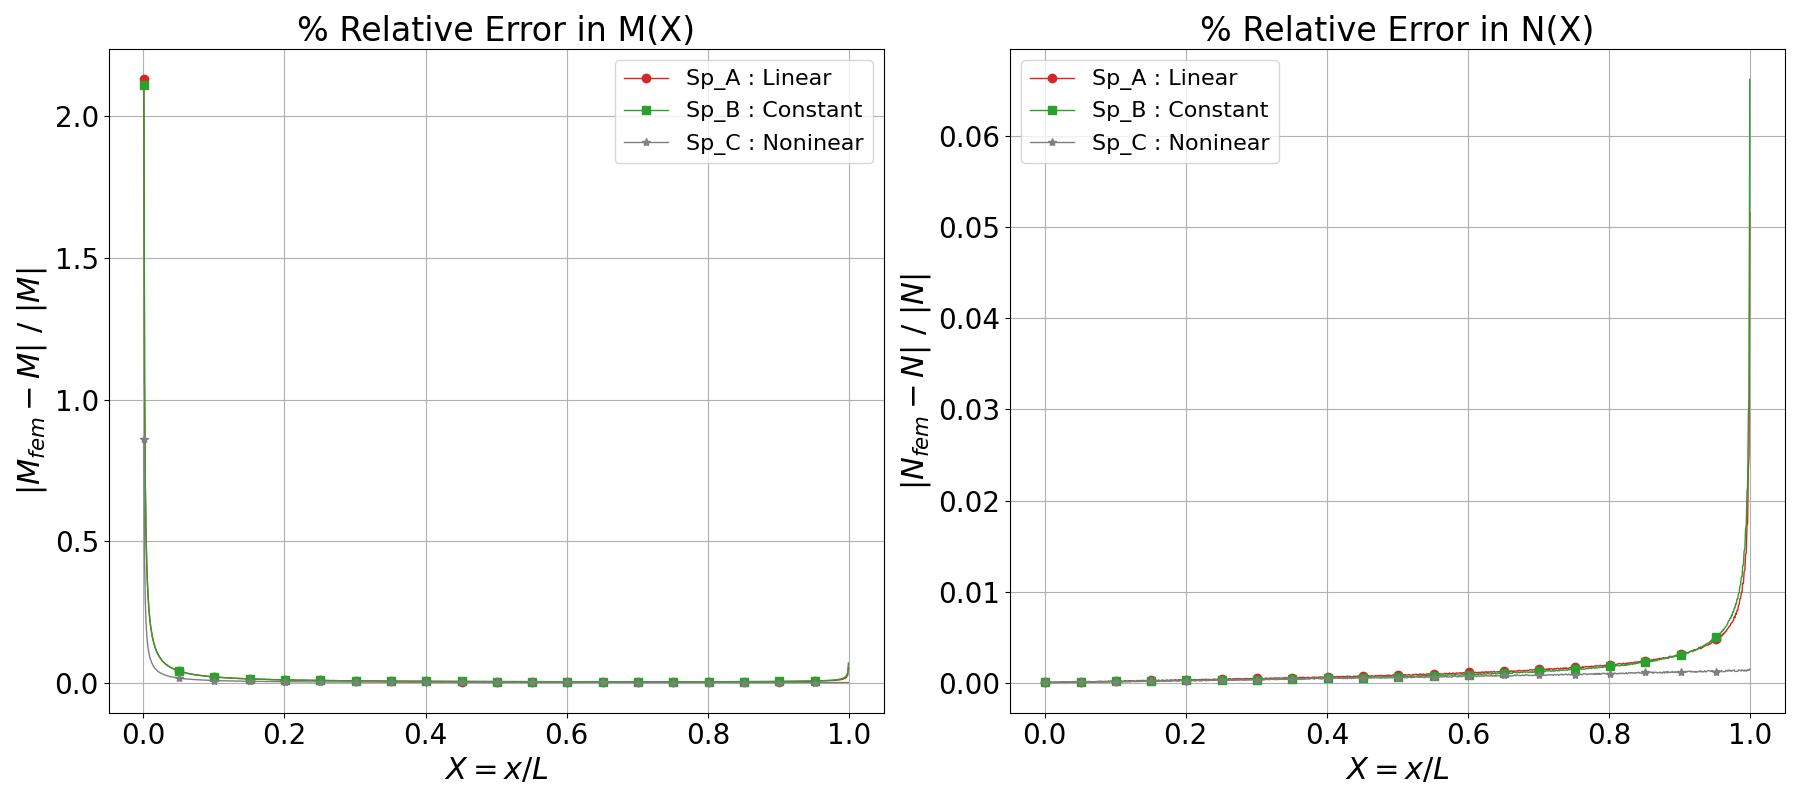

In [5]:
#%matplotlib widget

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(18,8))

plot_dict_kwargs = {"linestyle":"solid", "linewidth":1, "markevery":50}

ax1.plot(X[1:-1], relerr_A_M[1:-1], marker='o', label="Sp_A : Linear",   color="tab:red",   **plot_dict_kwargs)
ax1.plot(X[1:-1], relerr_B_M[1:-1], marker='s', label="Sp_B : Constant", color="tab:green", **plot_dict_kwargs)
ax1.plot(X[1:-1], relerr_C_M[1:-1], marker='*', label="Sp_C : Noninear", color="tab:grey",  **plot_dict_kwargs)

ax2.plot(X[1:-1], relerr_A_N[1:-1], marker='o', label="Sp_A : Linear",   color="tab:red",   **plot_dict_kwargs)
ax2.plot(X[1:-1], relerr_B_N[1:-1], marker='s', label="Sp_B : Constant", color="tab:green", **plot_dict_kwargs)
ax2.plot(X[1:-1], relerr_C_N[1:-1], marker='*', label="Sp_C : Noninear", color="tab:grey",  **plot_dict_kwargs)

################################ PLOT CONFIGURATION
ax1.set_title("% Relative Error in M(X)", fontsize=24)
ax2.set_title("% Relative Error in N(X)", fontsize=24)
ax1.set_ylabel("$|M_{fem} - M|$ / $|M|$", fontsize=22)
ax2.set_ylabel("$|N_{fem} - N|$ / $|N|$", fontsize=22)

#ax1.annotate("A", xy=(0.7,0.495),  xytext=(0.7,0.495),  color="red",   size=16)
#ax1.annotate("B", xy=(0.775,0.44), xytext=(0.775,0.44), color="green", size=16)
#ax1.annotate("C", xy=(0.64,0.59),  xytext=(0.64,0.59),  color="grey",  size=16)

#ax2.annotate("A", xy=(0.5,0.5), xytext=(0.65,0.82), color="red", size=16)
#ax2.annotate("B", xy=(0.5,0.5), xytext=(0.75,0.85), color="green", size=16)
#ax2.annotate("C", xy=(0.54,0.79), xytext=(0.54,0.79), color="grey", size=16)

for ax in [ax1, ax2]:
    ax.legend(fontsize=16)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    ax.set_xlabel("$X = x/L$", fontsize=22)
    ax.grid()

plt.tight_layout()
fig.savefig("RelativeError_plots.svg")
fig.savefig("RelativeError_plots.png")
plt.show()

#### Only Analytical 

In [ ]:
#%matplotlib widget
n_points = 1001
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(18,8))
dX = 50
X = np.linspace(0.0,1.0, n_points)

################################ SOURCE TYPE A
# analytical
def func(M, X):
    return 2*np.arctan(M) - M - (np.pi/2 - 1)*X
M = np.asarray([fsolve(func, X_, X_)[0] for X_ in X])
N = 1 / (1 + M**2)

# plot
ax1.plot(X, M, color="tab:red", linestyle="solid", linewidth=2)
ax2.plot(X, N, color="tab:red", linestyle="solid", linewidth=2)

################################ SOURCE TYPE B
# analytical
def func(M, X):
    return (1+M**2)*X - 2*M
M = np.asarray([fsolve(func, X_, X_)[0] for X_ in X])
N = 1 / (1 + M*M)

# plot
ax1.plot(X, M, color="tab:green", linestyle="solid", linewidth=2)
ax2.plot(X, N, color="tab:green", linestyle="solid", linewidth=2)

################################ SOURCE TYPE C
# analytical
M = np.tan(np.pi*X/4)
N = 1 / (1 + M*M)

# plot
ax1.plot(X, M, label="Analytical", color="tab:grey", linestyle="solid", linewidth=2)
ax2.plot(X, N, label="Analytical", color="tab:grey", linestyle="solid", linewidth=2)

################################ PLOT CONFIGURATION
ax1.set_title("M(X)", fontsize=24)
ax2.set_title("N(X)", fontsize=24)
ax1.set_ylabel("$M = v/c_s$",fontsize=22)
ax2.set_ylabel("$N = n/n_o$", fontsize=22)

ax1.annotate("A", xy=(0.7,0.495),  xytext=(0.7,0.495),  color="red",   size=16)
ax1.annotate("B", xy=(0.775,0.44), xytext=(0.775,0.44), color="green", size=16)
ax1.annotate("C", xy=(0.64,0.59),  xytext=(0.64,0.59),  color="grey",  size=16)

ax2.annotate("A", xy=(0.5,0.5), xytext=(0.65,0.82), color="red", size=16)
ax2.annotate("B", xy=(0.5,0.5), xytext=(0.75,0.85), color="green", size=16)
ax2.annotate("C", xy=(0.54,0.79), xytext=(0.54,0.79), color="grey", size=16)

for ax in [ax1, ax2]:
    #ax.legend(fontsize=20)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    ax.set_xlabel("$X = x/L$", fontsize=22)
    ax.grid()
    
fig.suptitle("Comparison of plasma velocity and density for different source types", fontsize=22)
fig.savefig("1D_Plasma_All_3_sources.svg")
plt.show()